# <font color = 'red'> ЛР 7. Метод k-ближайших соседей. Знакомство с средой Google colab.</font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 14.10.2024

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Метод k-ближайших соседей.  </font>

Метод ближайщих соседей - один из самых интуитивно понятных но в тоже время эффективных методов класссификации.

Общая идея метода.

1. Предварительное обучение не требуется. Прогноз делается на основе известных данных.
2. Для тестового вектора признаков $\overline{x_{0}}$ находим ближайшие $k$ в пространстве признаков с помощью заданной метрики.
3. Классифицируем $\overline{x_{0}}$  по большинству меток представителей множества $k$ соседей из п 2. 

Подробнее [тут](https://habr.com/ru/articles/149693/) 


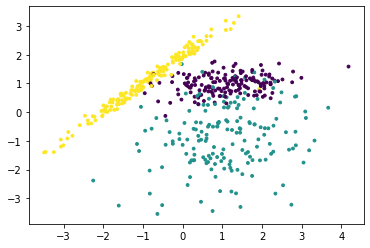

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *KNeighborsClassifier*.
4. Сравните работу полученных моеделей.
5. Изучите и эмпирически протестируйте гиперпараметры моделей для вашей и встроенной функции.
6. Можно ли переобучить классификатор k-ближайших соседей? Эмпирически подтвердите!

## <font color = 'green'> 2. Элементарная работа с изображениями  </font>

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

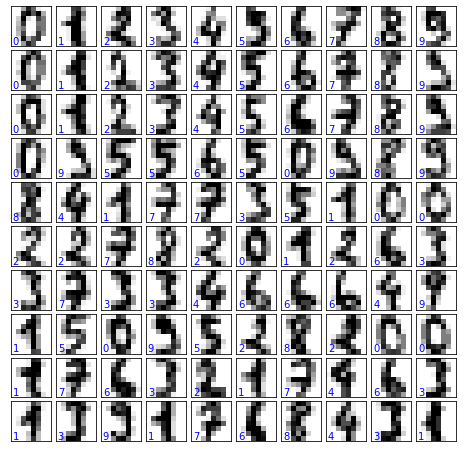

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [4]:
X = digits.data
X.shape

(1797, 64)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать изображения как векторы числовых признаков?
2. Реализуйте классификатор для определения цифры на изображении используя различные модели, изученные в ЛР4-ЛР6. 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

## <font color = 'green'> 3. Работа с текстом.  </font>

Текстовые признаки также можно сводить к числовым. Для этого существует ряд подходов, которые изучаются подробно в отдельном разделе науки о данных. В прошлых ЛР вы уже изучили один из них TF-IDF -векторизацию. 

Подробнее [тут](https://yandex.ru/q/datascience/8268666625/).

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

test = X.toarray()
test

array([[0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
        0.        , 0.        , 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.35829137, 0.        ],
       [0.40619178, 0.31544415, 0.        , 0.        , 0.53409337,
        0.53409337, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40619178, 0.        ],
       [0.32412354, 0.25171084, 0.        , 0.        , 0.        ,
        0.        , 0.4261835 , 0.        , 0.4261835 , 0.4261835 ,
        0.32412354, 0.        , 0.4261835 ]])

In [8]:
vectorizer.vocabulary_

{'it': 3,
 'is': 2,
 'going': 1,
 'to': 10,
 'rain': 7,
 'today': 11,
 'am': 0,
 'not': 4,
 'outside': 5,
 'watch': 12,
 'the': 9,
 'season': 8,
 'premiere': 6}

<font color = 'red' size = 5>Задание 3 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать тексты как векторы числовых признаков?
2. Реализуйте классификатор (на основе любой изученной вами модели) для определения эмоционального оттенка отзывов к фильмам. 
   Для преобразования текста используйте векторизацию TF-IDF. Предварительно минимально обработайте текст (стоп-слова, леммантизатор, посторонние символы) 
3. Попытайтесь найти оптимальную модель прогноза на основе KNN метода. Как влияет количество признаков на работоспособность модели?
4. Попытайтесь оптимизировать количество фич в тексте используя другой векторизатор.*

**Учитывайте, что векторизатор значительно увеличивает количество фич! Будьте внимательны со скоростью и производительностью!**

[Датасет](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

## <font color = 'green'> 4. Знакомство с Google Colab  </font>

<font color = 'red' size = 5>Задание 4 </font>


Для работы с данным заданием использовать Google Colab.

1. Проведите предварительную обработку данных. Автоматически загрузите их в Google colab.
2. Постройте модели классификации на основе различных методов, изученных вами из встроееной библиотеки. 
3. Подберите оптимальные гиперпараметры моделей используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!

[Датасет](https://www.kaggle.com/c/titanic/data?select=test.csv)

[Colab](https://adriandolinay.medium.com/an-introduction-to-google-colab-2023-6c26792827b3)




